# Pemetaan Daerah di Sulawesi Tenggara Berdasarkan Angka Kemiskinan Menggunakan Metode Fuzzy C-Means

## Pengantar

Analisis ini bertujuan untuk mendukung penelitian kami yang berjudul <b>Pengaruh Rasio Guru dan Siswa di Jenjang SD-SMP-SMA Terhadap Kualitas Pendidikan Sederajat di Sulawesi Tenggara</b> dengan menganalisis pengaruh rasio guru dan siswa terhadap kualitas pendidikan di Jenjang SD-SMP-SMA Sederajat di Sulawesi Tenggara. Adapun penelitian tersebut menggunakan pendekatan kuantitatif dengan mengumpulkan data dari studi pustaka.

## Daftar Isi

* Pengantar
* Daftar Isi
* Import Library
* Import Data
    * Import data Indeks Pendidikan
    * Data Rasio Guru dan Siswa
        
* Data Preparation
    * Cleansing Data
    * Data Preprocessing
* Visualisasi Data
    * Visualisasi data Indeks Pendidikan
    * visualisasi Top 5 dan Bottom 5 Indeks Pendidikan
    * Indeks Pendidikan (Mappping)
    * visualisasi data Data Rasio Guru dan Siswa
    * visualisasi Top 5 dan Bottom 5 Rasio guru dan siswa
    * Hubungan Antara Indeks Pendidikan dan Rasio Guru-Siswa
        * Diagram batang perbandingan
        * Scatter Plot
        * Grafik
* Analisis Korelasi
* Kesimpulan
* Referensi

## Import Library

Abaikan peringatan. <br> Terkadang <b>warning</b> perlu diabaikan di mana peringatan tersebut muncul secara berulang atau tidak relevan.

In [ ]:
# pip install geopandas
# pip install fuzzy-c-means

In [4]:
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.ops import unary_union

from sklearn.metrics import silhouette_score

## Import Data

### Data Jumlah Penduduk Miskin Berdasarkan Kabupaten/Kota di Sulawesi Tenggara Tahun 2024

Sumber : [BPS](https://sultra.bps.go.id/id/statistics-table/2/MjQ4IzI=/jumlah-penduduk-miskin-provinsi-sulawesi-tenggara-menurut-kabupaten-kota.html)

Deskripsi : Diolah Dari Hasil Survei Sosial Ekonomi Nasional (SUSENAS).

Diakses pada 30 Desember 2024.

In [40]:
df_miskin = pd.read_csv("data/Jumlah Penduduk Miskin Provinsi Sulawesi Tenggara Menurut Kabupaten_Kota, 2024.csv")
df_miskin.name = "Data Jumlah Penduduk Miskin Berdasarkan Kabupaten/Kota di Sulawesi Tenggara Tahun 2024"
print(df_miskin)

              Wilayah  Jiwa (Ribu)
0               Buton        14.41
1                Muna        31.82
2              Konawe        33.99
3              Kolaka        33.20
4      Konawe Selatan        37.09
5             Bombana        20.56
6            Wakatobi        14.93
7        Kolaka Utara        22.07
8         Buton Utara         9.18
9        Konawe Utara         8.94
10       Kolaka Timur        20.33
11   Konawe Kepulauan         5.36
12         Muna Barat        11.36
13       Buton Tengah        13.52
14      Buton Selatan        11.50
15       Kota Kendari        18.20
16        Kota Baubau        13.25
17  Sulawesi Tenggara       319.71


In [41]:
df_miskin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Wilayah      18 non-null     object 
 1   Jiwa (Ribu)  18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 420.0+ bytes


### Data Jumlah Penduduk Berdasarkan Kabupaten/Kota di Sulawesi Tenggara Tahun 2024

Sumber : [Databoks Katabuku](https://databoks.katadata.co.id/index.php/demografi/statistik/cf7359636ee0def/penduduk-sulawesi-tenggara-capai-275-juta-jiwa-12-ada-di-kota-kendari-pada-juni-2024)

Deskripsi : Melansir data kependudukan Direktorat Jenderal Kependudukan dan Pencatatan Sipil (Dukcapil) Kementerian Dalam Negeri, jumlah penduduk Sulawesi Tenggara mencapai 2,75 juta jiwa pada Juni 2024. Secara administrasi, Sulawesi Tenggara terbagi menjadi 2 kota dan 15 kabupaten, dengan 11 kecamatan yang memiliki 65 kelurahan.

Diakses pada 30 Desember 2024.

In [7]:
df_total = pd.read_csv("data/Jumlah Penduduk Provinsi Sulawesi Tenggara Menurut Kabupaten_Kota, 2024.csv")
df_total.name = "data/Data Jumlah Penduduk Berdasarkan Kabupaten/Kota di Sulawesi Tenggara Tahun 2024"
print(df_total)

              Nama Data   Nilai
0          Kota Kendari  351085
1   Kab. Konawe Selatan  322946
2           Kab. Konawe  264601
3           Kab. Kolaka  247680
4             Kab. Muna  229988
5          Kab. Bombana  163402
6          Kota Bau Bau  161280
7     Kab. Kolaka Utara  140488
8     Kab. Kolaka Timur  128160
9     Kab. Buton Tengah  121369
10           Kab. Buton  120873
11        Kab. Wakatobi  117630
12   Kab. Buton Selatan  101635
13      Kab. Muna Barat   87348
14    Kab. Konawe Utara   79782
15     Kab. Buton Utara   72757
16     Kab. Kep. Konawe   42683


In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nama Data  17 non-null     object
 1   Nilai      17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


## Data Preparation

### Cleansing Data

In [9]:
def cleansing_check(df):
    count_nan = df.isnull().sum().sum()

    count_zero = (df == 0).sum().sum()
    print(df.name)
    print(f"Jumlah nilai NaN dalam DataFrame: {count_nan}")
    print(f"Jumlah elemen yang sama dengan 0 dalam DataFrame: {count_zero} \n")

In [ ]:
cleansing_check(df_miskin)
cleansing_check(df_total)

data/Data Jumlah Penduduk Miskin Berdasarkan Kabupaten/Kota di Sulawesi Tenggara Tahun 2024
Jumlah nilai NaN dalam DataFrame: 0
Jumlah elemen yang sama dengan 0 dalam DataFrame: 0 

data/Data Jumlah Penduduk Berdasarkan Kabupaten/Kota di Sulawesi Tenggara Tahun 2024
Jumlah nilai NaN dalam DataFrame: 0
Jumlah elemen yang sama dengan 0 dalam DataFrame: 0 



Tidak ditemukan data yang kosong.

### Data Preprocessing

Tahap ini diperlukan karena alasan-alasan berikut:

- Data yang akan digunakan hanya mencakup kabupaten/kota, sehingga data **Sulawesi Tenggara** akan dihapus.
- Data pada `df_miskin` kolom kedua akan diubah formatnya menjadi satuan (bukan ribu jiwa).
- Penamaan kabupaten/kota pada kedua dataframe tidak konsisten.
- Kedua dataframe akan digabungkan, dengan kolom kedua menyimpan data jumlah penduduk miskin, dan kolom ketiga berisi jumlah total penduduk.
- Diperlukannya angka kemiskinan, dengan menghitung persentase jumlah penduduk miskin dari keseluruhannya.

In [14]:
df_miskin = df_miskin[:17]
df_miskin['Jiwa (Ribu)'] = (df_miskin['Jiwa (Ribu)'] * 1000).astype(int)
print(df_miskin)

             Wilayah  Jiwa (Ribu)
0              Buton     14410000
1               Muna     31820000
2             Konawe     33990000
3             Kolaka     33200000
4     Konawe Selatan     37090000
5            Bombana     20560000
6           Wakatobi     14930000
7       Kolaka Utara     22070000
8        Buton Utara      9180000
9       Konawe Utara      8940000
10      Kolaka Timur     20330000
11  Konawe Kepulauan      5360000
12        Muna Barat     11360000
13      Buton Tengah     13520000
14     Buton Selatan     11500000
15      Kota Kendari     18200000
16       Kota Baubau     13250000


In [16]:
name_mapping = {
    'Kota Kendari': 'Kota Kendari',
    'Kab. Konawe Selatan': 'Konawe Selatan',
    'Kab. Konawe': 'Konawe',
    'Kab. Kolaka': 'Kolaka',
    'Kab. Muna': 'Muna',
    'Kab. Bombana': 'Bombana',
    'Kota Bau Bau': 'Kota Baubau',
    'Kab. Kolaka Utara': 'Kolaka Utara',
    'Kab. Kolaka Timur': 'Kolaka Timur',
    'Kab. Buton Tengah': 'Buton Tengah',
    'Kab. Buton': 'Buton',
    'Kab. Wakatobi': 'Wakatobi',
    'Kab. Buton Selatan': 'Buton Selatan',
    'Kab. Muna Barat': 'Muna Barat',
    'Kab. Konawe Utara': 'Konawe Utara',
    'Kab. Buton Utara': 'Buton Utara',
    'Kab. Kep. Konawe': 'Konawe Kepulauan'
}

df_total['Nama Data'] = df_total['Nama Data'].replace(name_mapping)

print(df_total)

           Nama Data   Nilai
0       Kota Kendari  351085
1     Konawe Selatan  322946
2             Konawe  264601
3             Kolaka  247680
4               Muna  229988
5            Bombana  163402
6        Kota Baubau  161280
7       Kolaka Utara  140488
8       Kolaka Timur  128160
9       Buton Tengah  121369
10             Buton  120873
11          Wakatobi  117630
12     Buton Selatan  101635
13        Muna Barat   87348
14      Konawe Utara   79782
15       Buton Utara   72757
16  Konawe Kepulauan   42683


In [17]:
df_merged = pd.merge(df_total, df_miskin, left_on='Nama Data', right_on='Wilayah', how='inner')

df_merged = df_merged[['Nama Data', 'Nilai', 'Jiwa (Ribu)']]
df_merged.columns = ['Nama Kabupaten/Kota', 'Jumlah Penduduk', 'Jumlah Penduduk Miskin']
df_merged['Angka Kemiskinan'] = (df_merged['Jumlah Penduduk Miskin'] / df_merged['Jumlah Penduduk']) * 100

print(df_merged)

   Nama Kabupaten/Kota  Jumlah Penduduk  Jumlah Penduduk Miskin  \
0         Kota Kendari           351085                18200000   
1       Konawe Selatan           322946                37090000   
2               Konawe           264601                33990000   
3               Kolaka           247680                33200000   
4                 Muna           229988                31820000   
5              Bombana           163402                20560000   
6          Kota Baubau           161280                13250000   
7         Kolaka Utara           140488                22070000   
8         Kolaka Timur           128160                20330000   
9         Buton Tengah           121369                13520000   
10               Buton           120873                14410000   
11            Wakatobi           117630                14930000   
12       Buton Selatan           101635                11500000   
13          Muna Barat            87348                1136000

In [18]:
data = df_merged[["Nama Kabupaten/Kota", "Angka Kemiskinan"]]

# Membuat objek scaler
scaler = MinMaxScaler()

# Melakukan Min-Max normalization pada kolom 'Angka Kemiskinan'
data['Angka Kemiskinan'] = scaler.fit_transform(data[['Angka Kemiskinan']])

# Menampilkan hasil DataFrame dengan kolom baru
data

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_12020\2101087798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Angka Kemiskinan'] = scaler.fit_transform(data[['Angka Kemiskinan']])


,Nama Kabupaten/Kota,Angka Kemiskinan
0,Kota Kendari,0.000000
1,Konawe Selatan,0.590030
2,Konawe,0.717463
3,Kolaka,0.769774
4,Muna,0.810144
5,Bombana,0.692808
6,Kota Baubau,0.283882
7,Kolaka Utara,0.985630
8,Kolaka Timur,1.000000
9,Buton Tengah,0.557695


## Klastering

In [19]:
# Memilih hanya kolom kedua (misalnya 'Feature2') untuk klastering
X = data[['Angka Kemiskinan']].values.T # Mengambil kolom kedua dan mengubahnya menjadi array 2D

n_clusters = 3
m = 2
max_iter = 100
error_threshold = 0.0001

# Melakukan klastering Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cmeans(X, n_clusters, m, error=error_threshold, maxiter=max_iter, init=None)

# Menentukan klaster berdasarkan derajat keanggotaan tertinggi
cluster_labels = np.argmax(u, axis=0)

# Menambahkan label klaster ke DataFrame
data['Cluster'] = cluster_labels

# Menampilkan data yang telah dikelompokkan
print(data)

   Nama Kabupaten/Kota  Angka Kemiskinan  Cluster
0         Kota Kendari          0.000000        0
1       Konawe Selatan          0.590030        1
2               Konawe          0.717463        1
3               Kolaka          0.769774        1
4                 Muna          0.810144        1
5              Bombana          0.692808        1
6          Kota Baubau          0.283882        0
7         Kolaka Utara          0.985630        2
8         Kolaka Timur          1.000000        2
9         Buton Tengah          0.557695        1
10               Buton          0.630924        1
11            Wakatobi          0.703097        1
12       Buton Selatan          0.574121        1
13          Muna Barat          0.732417        1
14        Konawe Utara          0.563871        1
15         Buton Utara          0.696074        1
16    Konawe Kepulauan          0.690488        1


C:\Users\My ASUS\AppData\Local\Temp\ipykernel_12020\225767744.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster_labels


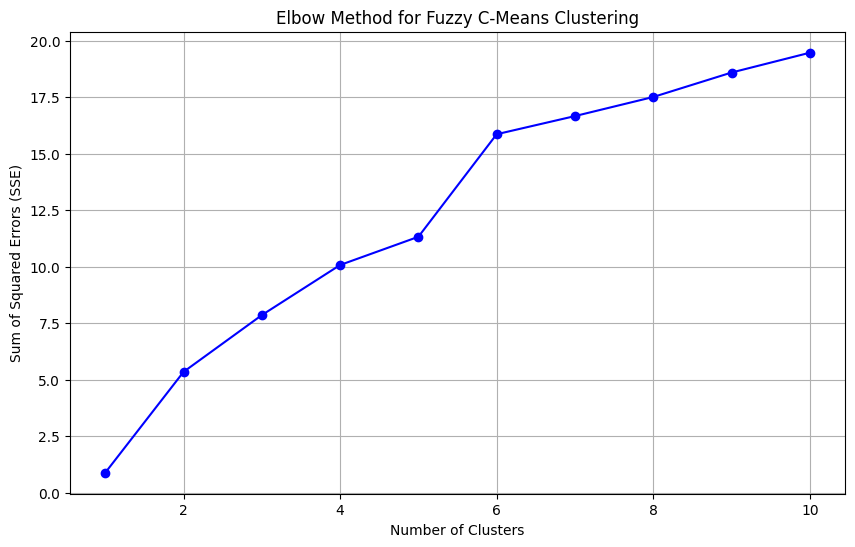

In [20]:

def fuzzy_cmeans_elbow(data, max_clusters=10, m=2, max_iter=100, error_threshold=0.0001):
    """
    Fungsi untuk menentukan jumlah klaster optimal menggunakan metode Elbow pada Fuzzy C-Means.

    Parameters:
    - data: Data yang akan dikelompokkan.
    - max_clusters: Jumlah maksimum klaster yang akan diuji.
    - m: Pangkat fuzziness (default 2).
    - max_iter: Maksimum iterasi untuk algoritma (default 100).
    - error_threshold: Ambang batas error (default 0.0001).

    Returns:
    - Menampilkan grafik Elbow.
    """
    sse_values = []

    # Melakukan klastering untuk jumlah klaster yang berbeda
    for n_clusters in range(1, max_clusters+1):
        cntr, u, _, _, _, _, _ = fuzz.cmeans(data.T, n_clusters, m, error=error_threshold, maxiter=max_iter)

        # Menghitung SSE (Sum of Squared Errors) untuk klaster tersebut
        sse = np.sum((u**m) * np.linalg.norm(data.T[:, np.newaxis] - cntr[:, :, np.newaxis], axis=0)**2)
        sse_values.append(sse)

    # Plot grafik Elbow
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters+1), sse_values, marker='o', color='b')
    plt.title('Elbow Method for Fuzzy C-Means Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid(True)
    plt.show()

# Contoh penggunaan
fuzzy_cmeans_elbow(data[['Angka Kemiskinan']].values, max_clusters=10)

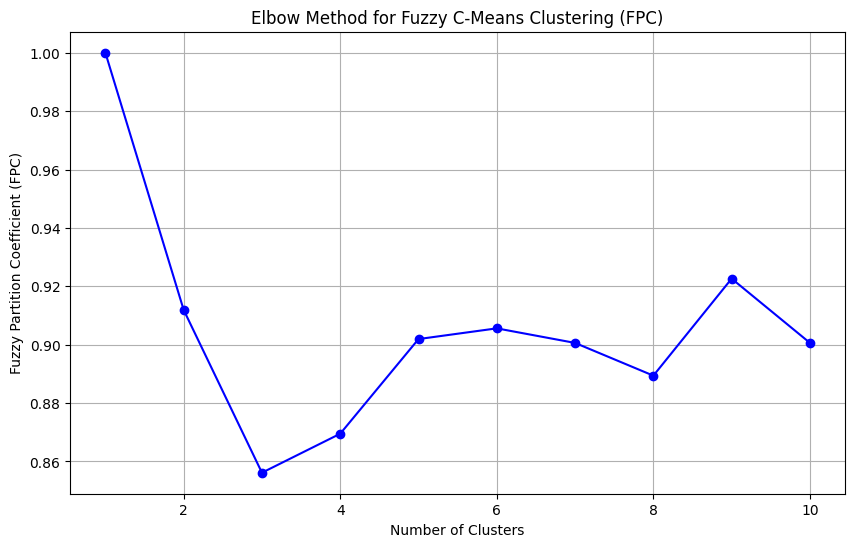

In [21]:

def fuzzy_cmeans_elbow(data, max_clusters=10, m=2, max_iter=100, error_threshold=0.0001):
    """
    Fungsi untuk menentukan jumlah klaster optimal menggunakan metode Elbow pada Fuzzy C-Means,
    dengan menggunakan Fuzzy Partition Coefficient (FPC) sebagai evaluasi.

    Parameters:
    - data: Data yang akan dikelompokkan.
    - max_clusters: Jumlah maksimum klaster yang akan diuji.
    - m: Pangkat fuzziness (default 2).
    - max_iter: Maksimum iterasi untuk algoritma (default 100).
    - error_threshold: Ambang batas error (default 0.0001).

    Returns:
    - Menampilkan grafik Elbow berdasarkan Fuzzy Partition Coefficient (FPC).
    """
    fpc_values = []

    # Melakukan klastering untuk jumlah klaster yang berbeda
    for n_clusters in range(1, max_clusters+1):
        cntr, u, _, _, _, _, _ = fuzz.cmeans(data.T, n_clusters, m, error=error_threshold, maxiter=max_iter)

        # Menghitung Fuzzy Partition Coefficient (FPC)
        fpc = np.sum(u**2) / u.shape[1]
        fpc_values.append(fpc)

    # Plot grafik Elbow berdasarkan FPC
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters+1), fpc_values, marker='o', color='b')
    plt.title('Elbow Method for Fuzzy C-Means Clustering (FPC)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Fuzzy Partition Coefficient (FPC)')
    plt.grid(True)
    plt.show()

# Contoh penggunaan
fuzzy_cmeans_elbow(data[['Angka Kemiskinan']].values, max_clusters=10)

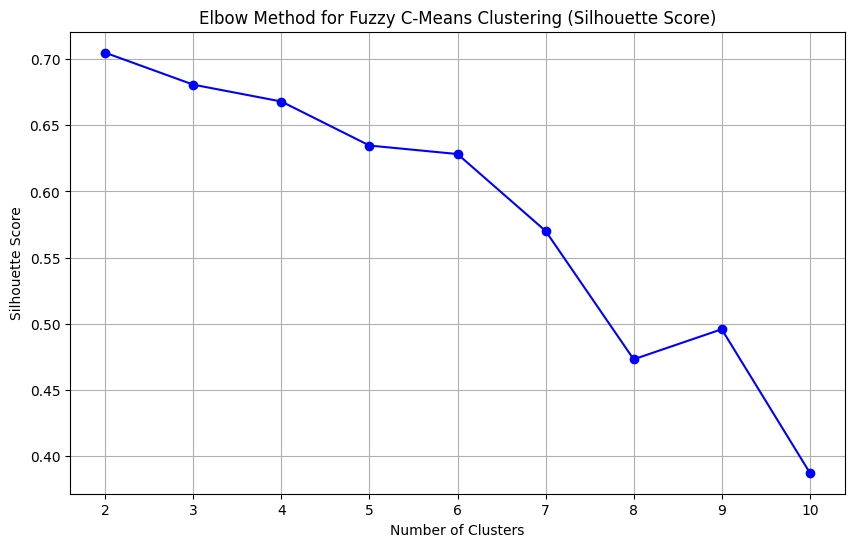

In [22]:
def fuzzy_cmeans_elbow_silhouette(data, max_clusters=10, m=2, max_iter=100, error_threshold=0.0001):
    """
    Fungsi untuk menentukan jumlah klaster optimal menggunakan metode Elbow pada Fuzzy C-Means,
    dengan menggunakan Silhouette Score sebagai evaluasi.

    Parameters:
    - data: Data yang akan dikelompokkan.
    - max_clusters: Jumlah maksimum klaster yang akan diuji.
    - m: Pangkat fuzziness (default 2).
    - max_iter: Maksimum iterasi untuk algoritma (default 100).
    - error_threshold: Ambang batas error (default 0.0001).

    Returns:
    - Menampilkan grafik Elbow berdasarkan Silhouette Score.
    """
    silhouette_scores = []

    # Melakukan klastering untuk jumlah klaster yang berbeda
    for n_clusters in range(2, max_clusters+1):
        cntr, u, _, _, _, _, _ = fuzz.cmeans(data.T, n_clusters, m, error=error_threshold, maxiter=max_iter)

        # Menentukan klaster berdasarkan derajat keanggotaan tertinggi
        cluster_labels = np.argmax(u, axis=0)

        # Menghitung Silhouette Score
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)

    # Plot grafik Elbow berdasarkan Silhouette Score
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', color='b')
    plt.title('Elbow Method for Fuzzy C-Means Clustering (Silhouette Score)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Contoh penggunaan
fuzzy_cmeans_elbow_silhouette(data[['Angka Kemiskinan']].values, max_clusters=10)


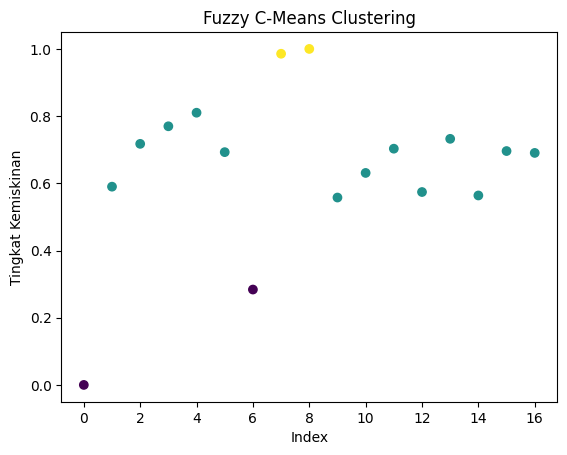

In [23]:
# Visualisasi hasil klastering
plt.scatter(data.index, data['Angka Kemiskinan'], c=data['Cluster'], cmap='viridis')
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Index')
plt.ylabel('Tingkat Kemiskinan')
plt.show()

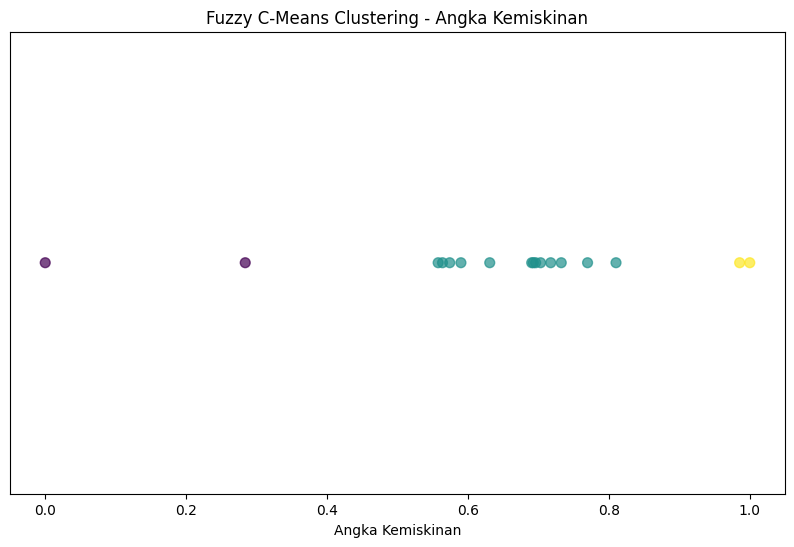

In [24]:
# Visualisasi hasil klastering hanya berdasarkan Angka Kemiskinan
plt.figure(figsize=(10, 6))
plt.scatter(data['Angka Kemiskinan'], [0]*len(data), c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)

# Menambahkan label dan judul
plt.title('Fuzzy C-Means Clustering - Angka Kemiskinan')
plt.xlabel('Angka Kemiskinan')
plt.yticks([])  # Menghilangkan sumbu Y karena tidak diperlukan

# Menampilkan plot
plt.show()

## Visualisasi Data

### Ranking Daerah Berdasarkan Jumlah Penduduk Miskin

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_12020\2774434540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah Penduduk Miskin', y='Nama Kabupaten/Kota', data=df_sorted, palette='rocket')


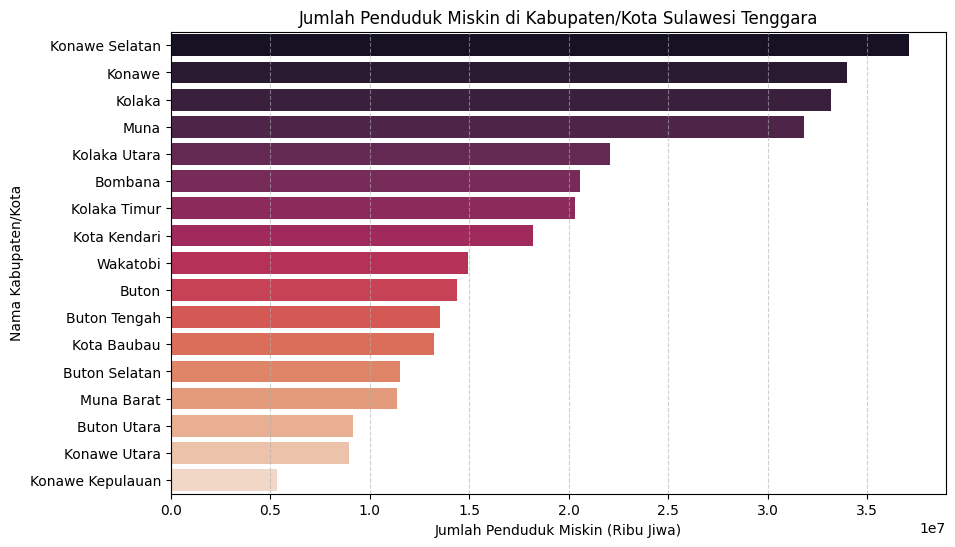

In [25]:
# Urutkan df_merged berdasarkan 'Jumlah Penduduk Miskin' dari yang terbesar
df_sorted = df_merged[['Nama Kabupaten/Kota', 'Jumlah Penduduk Miskin']].sort_values(by='Jumlah Penduduk Miskin', ascending=False)

# Plot batang menggunakan seaborn
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar
sns.barplot(x='Jumlah Penduduk Miskin', y='Nama Kabupaten/Kota', data=df_sorted, palette='rocket')

# Menambahkan label dan judul
plt.title('Jumlah Penduduk Miskin di Kabupaten/Kota Sulawesi Tenggara')
plt.xlabel('Jumlah Penduduk Miskin (Ribu Jiwa)')
plt.ylabel('Nama Kabupaten/Kota')

plt.grid(axis='x', linestyle='--', alpha=0.6)

# Menampilkan plot
plt.show()

### Ranking Daerah Berdasarkan Jumlah Penduduk

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_12020\1418084850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah Penduduk', y='Nama Kabupaten/Kota', data=df_sorted, palette='rocket')


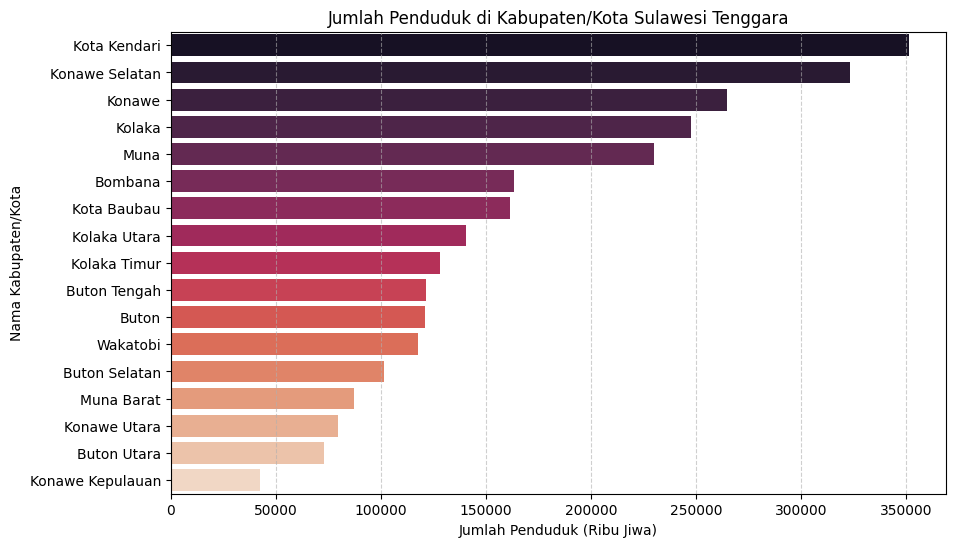

In [26]:
# Urutkan df_merged berdasarkan 'Jumlah Penduduk Miskin' dari yang terbesar
df_sorted = df_merged[['Nama Kabupaten/Kota', 'Jumlah Penduduk']].sort_values(by='Jumlah Penduduk', ascending=False)

# Plot batang menggunakan seaborn
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar
sns.barplot(x='Jumlah Penduduk', y='Nama Kabupaten/Kota', data=df_sorted, palette='rocket')

# Menambahkan label dan judul
plt.title('Jumlah Penduduk di Kabupaten/Kota Sulawesi Tenggara')
plt.xlabel('Jumlah Penduduk (Ribu Jiwa)')
plt.ylabel('Nama Kabupaten/Kota')

plt.grid(axis='x', linestyle='--', alpha=0.6)

# Menampilkan plot
plt.show()

### Ranking Daerah Berdasarkan Angka Kemiskinan

C:\Users\My ASUS\AppData\Local\Temp\ipykernel_12020\518564408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Angka Kemiskinan', y='Nama Kabupaten/Kota', data=df_sorted, palette='rocket')


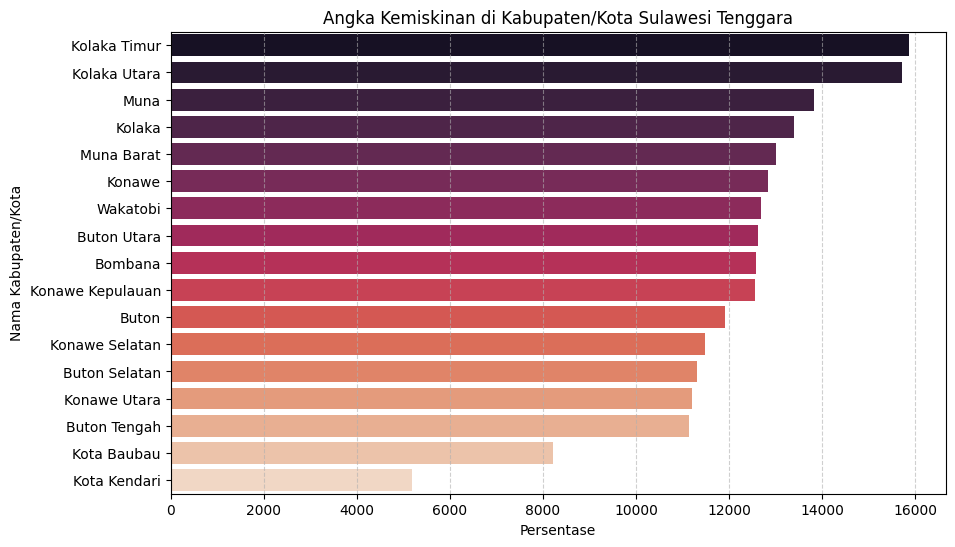

In [27]:
# Urutkan df_merged berdasarkan 'Jumlah Penduduk Miskin' dari yang terbesar
df_sorted = df_merged[['Nama Kabupaten/Kota', 'Angka Kemiskinan']].sort_values(by='Angka Kemiskinan', ascending=False)

# Plot batang menggunakan seaborn
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar
sns.barplot(x='Angka Kemiskinan', y='Nama Kabupaten/Kota', data=df_sorted, palette='rocket')

# Menambahkan label dan judul
plt.title('Angka Kemiskinan di Kabupaten/Kota Sulawesi Tenggara')
plt.xlabel('Persentase')
plt.ylabel('Nama Kabupaten/Kota')

plt.grid(axis='x', linestyle='--', alpha=0.6)

# Menampilkan plot
plt.show()

### Pemetaan Berdasarkan Jumlah Penduduk Miskin

In [28]:
shp_path = 'shapefile'
df_gdf = gpd.read_file(shp_path)
df_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAMOBJ      23 non-null     object  
 1   FCODE       23 non-null     object  
 2   REMARK      6 non-null      object  
 3   METADATA    23 non-null     object  
 4   SRS_ID      23 non-null     object  
 5   KDBBPS      0 non-null      object  
 6   KDCBPS      0 non-null      object  
 7   KDCPUM      0 non-null      object  
 8   KDEBPS      0 non-null      object  
 9   KDEPUM      0 non-null      object  
 10  KDPBPS      0 non-null      object  
 11  KDPKAB      23 non-null     object  
 12  KDPPUM      23 non-null     object  
 13  LUASWH      23 non-null     float64 
 14  TIPADM      23 non-null     int64   
 15  WADMKC      0 non-null      object  
 16  WADMKD      0 non-null      object  
 17  WADMKK      23 non-null     object  
 18  WADMPR      23 non-null     object  
 19  WI

In [29]:
data_gdf = df_gdf[['NAMOBJ', 'geometry']]
data_gdf.columns = ["Nama Kabupaten/Kota", 'geometry']
data_gdf

,Nama Kabupaten/Kota,geometry
0,Bombana,"MULTIPOLYGON Z (((121.7662 -5.34183 0, 121.766..."
1,Buton,"MULTIPOLYGON Z (((122.84691 -5.52612 0, 122.84..."
2,Buton Selatan,"MULTIPOLYGON Z (((122.68746 -6.178 0, 122.6875..."
3,Buton Tengah,"MULTIPOLYGON Z (((121.93938 -5.49292 0, 121.93..."
4,Buton Utara,"MULTIPOLYGON Z (((122.96461 -4.96699 0, 122.96..."
5,Kolaka,"MULTIPOLYGON Z (((121.49008 -4.19265 0, 121.49..."
6,Kolaka Timur,"POLYGON Z ((121.43097 -3.27544 0, 121.43097 -3..."
7,Kolaka Utara,"MULTIPOLYGON Z (((121.04414 -3.03122 0, 121.04..."
8,Konawe,"MULTIPOLYGON Z (((122.76169 -3.98063 0, 122.76..."
9,Konawe Kepulauan,"MULTIPOLYGON Z (((122.976 -4.16017 0, 122.9758..."


In [30]:
# Menggabungkan geometri berdasarkan kolom 'NAMOBJ'
grouped = data_gdf.groupby('Nama Kabupaten/Kota')['geometry'].apply(unary_union).reset_index()

# Membuat GeoDataFrame baru dengan geometri yang sudah digabungkan
data_gdf = gpd.GeoDataFrame(grouped, geometry='geometry')

data_gdf['Nama Kabupaten/Kota'] = data_gdf['Nama Kabupaten/Kota'].replace({'Kota Bau Bau': 'Kota Baubau'})

data_gdf

,Nama Kabupaten/Kota,geometry
0,Bombana,"MULTIPOLYGON Z (((121.76707 -5.34237 0, 121.76..."
1,Buton,"MULTIPOLYGON Z (((122.89392 -5.56532 0, 122.89..."
2,Buton Selatan,"MULTIPOLYGON Z (((122.49635 -5.65119 0, 122.49..."
3,Buton Tengah,"MULTIPOLYGON Z (((122.05885 -5.49187 0, 122.05..."
4,Buton Utara,"MULTIPOLYGON Z (((122.96394 -4.96692 0, 122.96..."
5,Kolaka,"MULTIPOLYGON Z (((121.44509 -4.17418 0, 121.44..."
6,Kolaka Timur,"POLYGON Z ((121.43097 -3.27544 0, 121.43097 -3..."
7,Kolaka Utara,"MULTIPOLYGON Z (((121.04387 -3.0312 0, 121.043..."
8,Konawe,"MULTIPOLYGON Z (((122.76092 -3.98063 0, 122.76..."
9,Konawe Kepulauan,"MULTIPOLYGON Z (((122.97587 -4.16017 0, 122.97..."


In [31]:
df_sorted = df_merged[['Nama Kabupaten/Kota', 'Jumlah Penduduk Miskin']].sort_values(by='Jumlah Penduduk Miskin', ascending=False)

data_gdf_ordered = pd.merge(df_sorted, data_gdf, on='Nama Kabupaten/Kota', how='left')
# data_gdf_ordered = data_gdf_ordered.drop(columns=['Jumlah Penduduk Miskin'])
data_gdf_ordered = gpd.GeoDataFrame(data_gdf_ordered, geometry=data_gdf_ordered['geometry'])
# data_gdf_ordered['index_column'] = data_gdf_ordered.index
# data_gdf_ordered.crs = df_gdf.crs
# data_gdf_ordered = data_gdf_ordered.to_crs(epsg=3395)
data_gdf_ordered

,Nama Kabupaten/Kota,Jumlah Penduduk Miskin,geometry
0,Konawe Selatan,37090000,"MULTIPOLYGON Z (((122.21884 -4.48749 0, 122.21..."
1,Konawe,33990000,"MULTIPOLYGON Z (((122.76092 -3.98063 0, 122.76..."
2,Kolaka,33200000,"MULTIPOLYGON Z (((121.44509 -4.17418 0, 121.44..."
3,Muna,31820000,"MULTIPOLYGON Z (((122.33496 -5.08989 0, 122.33..."
4,Kolaka Utara,22070000,"MULTIPOLYGON Z (((121.04387 -3.0312 0, 121.043..."
5,Bombana,20560000,"MULTIPOLYGON Z (((121.76707 -5.34237 0, 121.76..."
6,Kolaka Timur,20330000,"POLYGON Z ((121.43097 -3.27544 0, 121.43097 -3..."
7,Kota Kendari,18200000,"MULTIPOLYGON Z (((122.49697 -3.90295 0, 122.49..."
8,Wakatobi,14930000,"MULTIPOLYGON Z (((123.60485 -5.42522 0, 123.60..."
9,Buton,14410000,"MULTIPOLYGON Z (((122.89392 -5.56532 0, 122.89..."


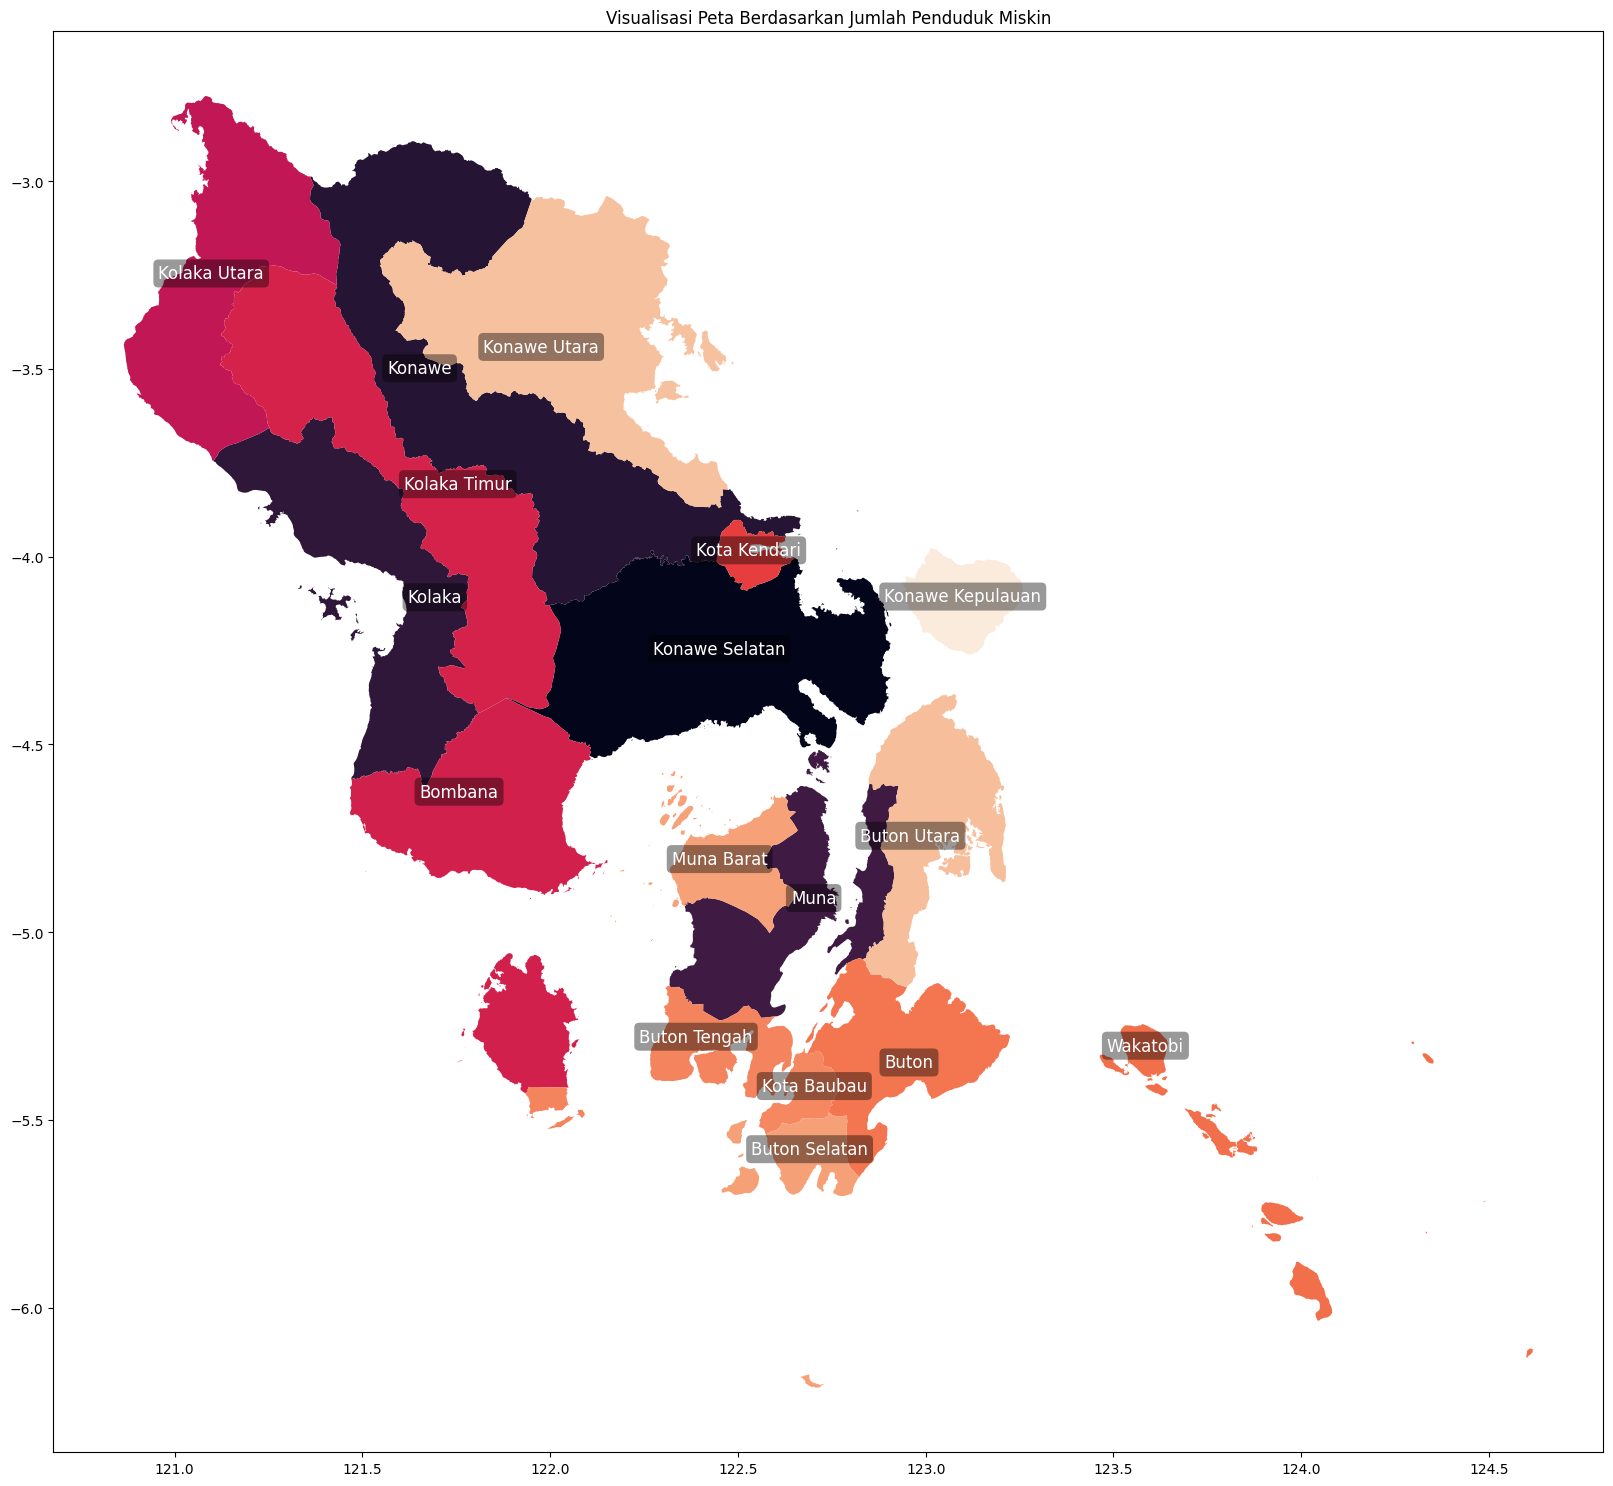

In [32]:
# Membuat plot
fig, ax = plt.subplots(figsize=(20, 20))
data_gdf_ordered.plot(ax=ax, column="Jumlah Penduduk Miskin", legend=False, cmap='rocket_r')

# Menambahkan label di dalam area geometrinya menggunakan representative_point()
for x, y, label in zip(data_gdf_ordered.geometry.centroid.x, data_gdf_ordered.geometry.centroid.y, data_gdf_ordered['Nama Kabupaten/Kota']):
    # Menggunakan representative_point untuk memastikan label berada di dalam geometri
    point = data_gdf_ordered.loc[data_gdf_ordered['Nama Kabupaten/Kota'] == label, 'geometry'].values[0].representative_point()

    # Menambahkan label dengan latar belakang dan pengaturan warna kontras
    ax.text(
        point.x, point.y, label,
        fontsize=12, ha='center', color='white',  # Menggunakan teks putih untuk kontras
        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.3')  # Latar belakang hitam transparan
    )

# Menambahkan judul
plt.title('Visualisasi Peta Berdasarkan Jumlah Penduduk Miskin')
plt.show()

### Pemetaan Berdasarkan Jumlah Penduduk

In [33]:
df_sorted = df_merged[['Nama Kabupaten/Kota', 'Jumlah Penduduk']].sort_values(by='Jumlah Penduduk', ascending=False)

data_gdf_ordered = pd.merge(df_sorted, data_gdf, on='Nama Kabupaten/Kota', how='left')
data_gdf_ordered = gpd.GeoDataFrame(data_gdf_ordered, geometry=data_gdf_ordered['geometry'])

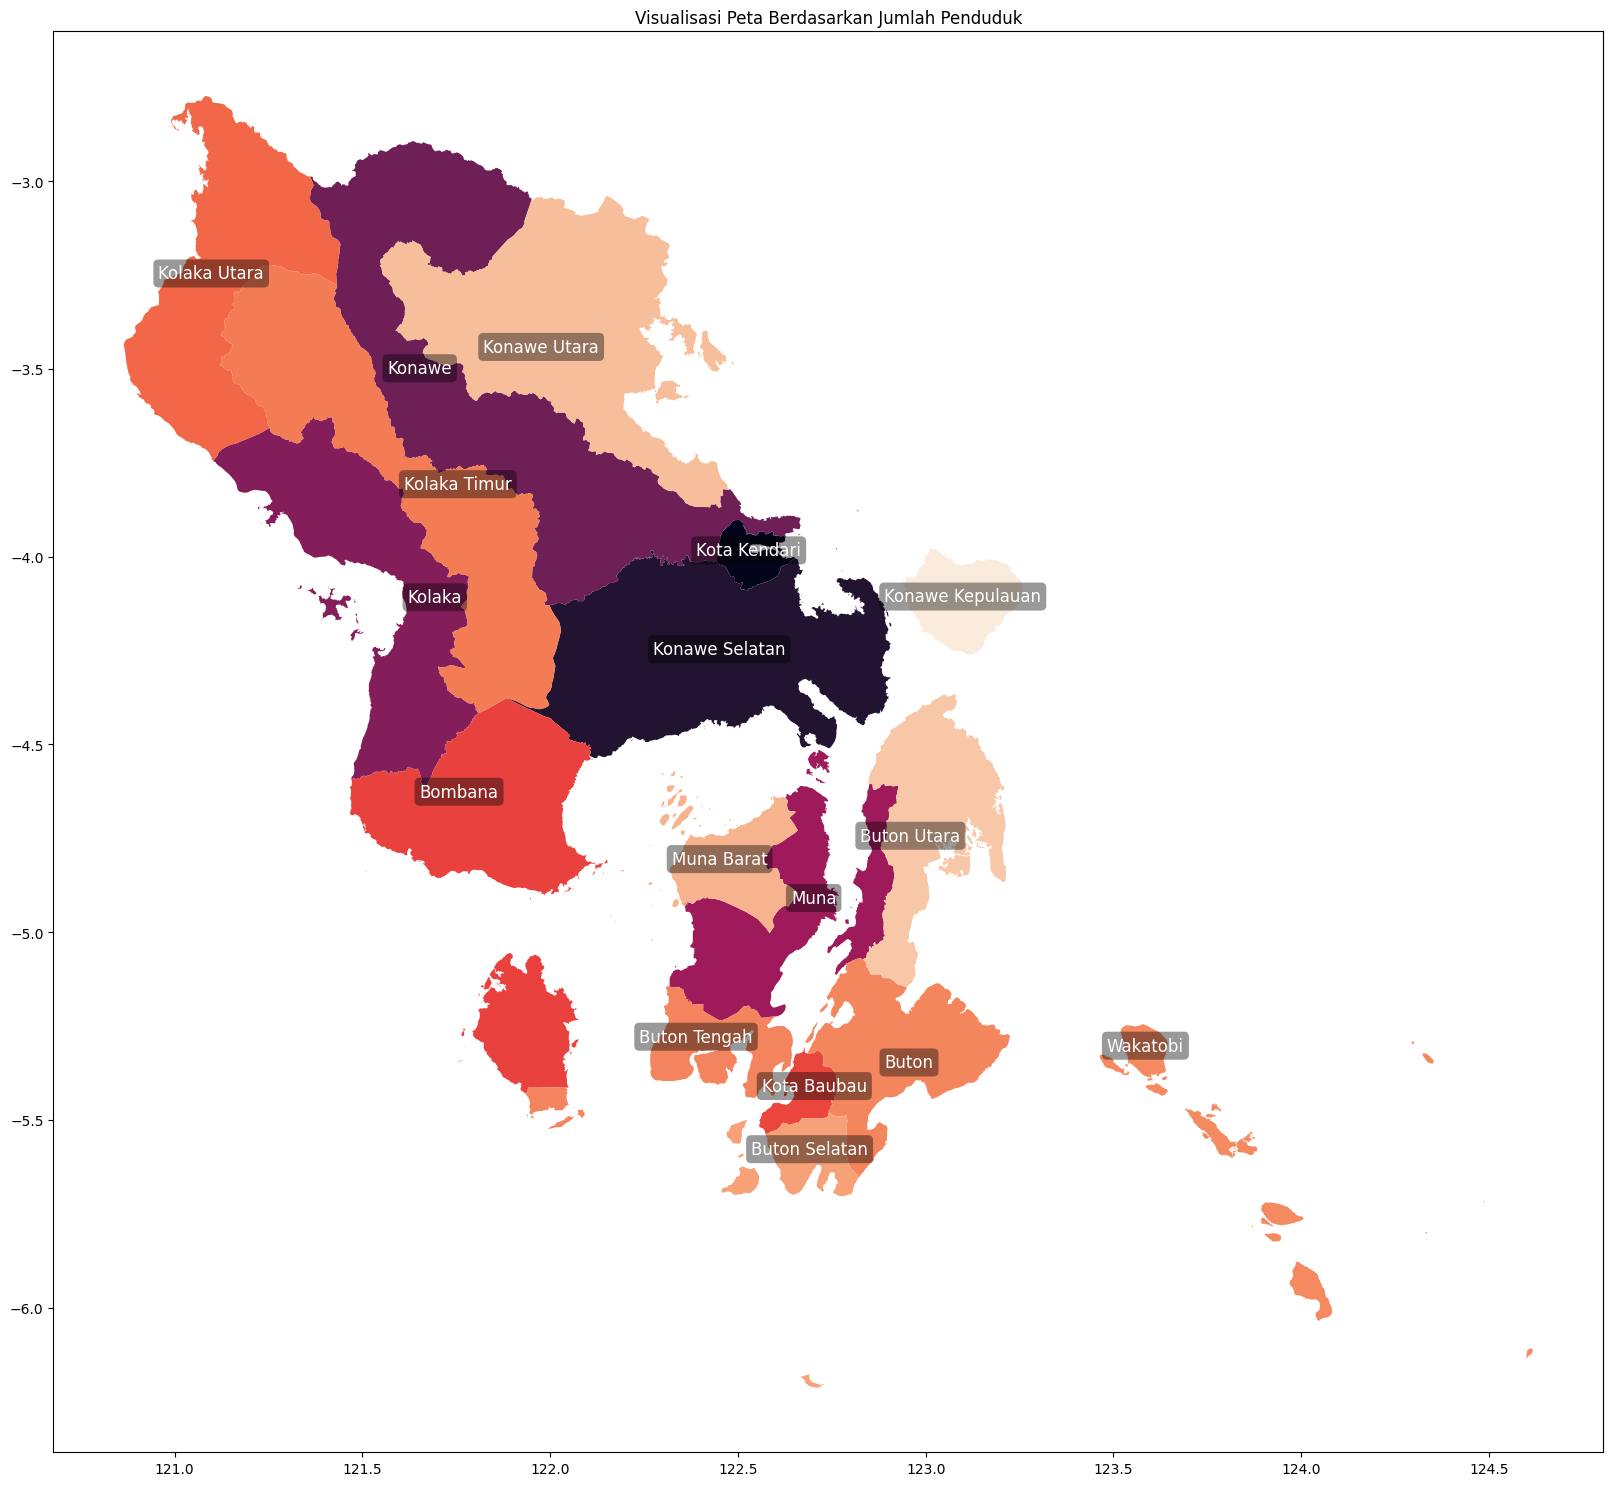

In [34]:
# Membuat plot
fig, ax = plt.subplots(figsize=(20, 20))
data_gdf_ordered.plot(ax=ax, column="Jumlah Penduduk", legend=False, cmap='rocket_r')

# Menambahkan label di dalam area geometrinya menggunakan representative_point()
for x, y, label in zip(data_gdf_ordered.geometry.centroid.x, data_gdf_ordered.geometry.centroid.y, data_gdf_ordered['Nama Kabupaten/Kota']):
    # Menggunakan representative_point untuk memastikan label berada di dalam geometri
    point = data_gdf_ordered.loc[data_gdf_ordered['Nama Kabupaten/Kota'] == label, 'geometry'].values[0].representative_point()

    # Menambahkan label dengan latar belakang dan pengaturan warna kontras
    ax.text(
        point.x, point.y, label,
        fontsize=12, ha='center', color='white',  # Menggunakan teks putih untuk kontras
        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.3')  # Latar belakang hitam transparan
    )

# Menambahkan judul
plt.title('Visualisasi Peta Berdasarkan Jumlah Penduduk')
plt.show()

### Pemetaan Berdasarkan Angka Kemiskinan

In [35]:
df_sorted = df_merged[['Nama Kabupaten/Kota', 'Angka Kemiskinan']].sort_values(by='Angka Kemiskinan', ascending=False)

data_gdf_ordered = pd.merge(df_sorted, data_gdf, on='Nama Kabupaten/Kota', how='left')
data_gdf_ordered = gpd.GeoDataFrame(data_gdf_ordered, geometry=data_gdf_ordered['geometry'])

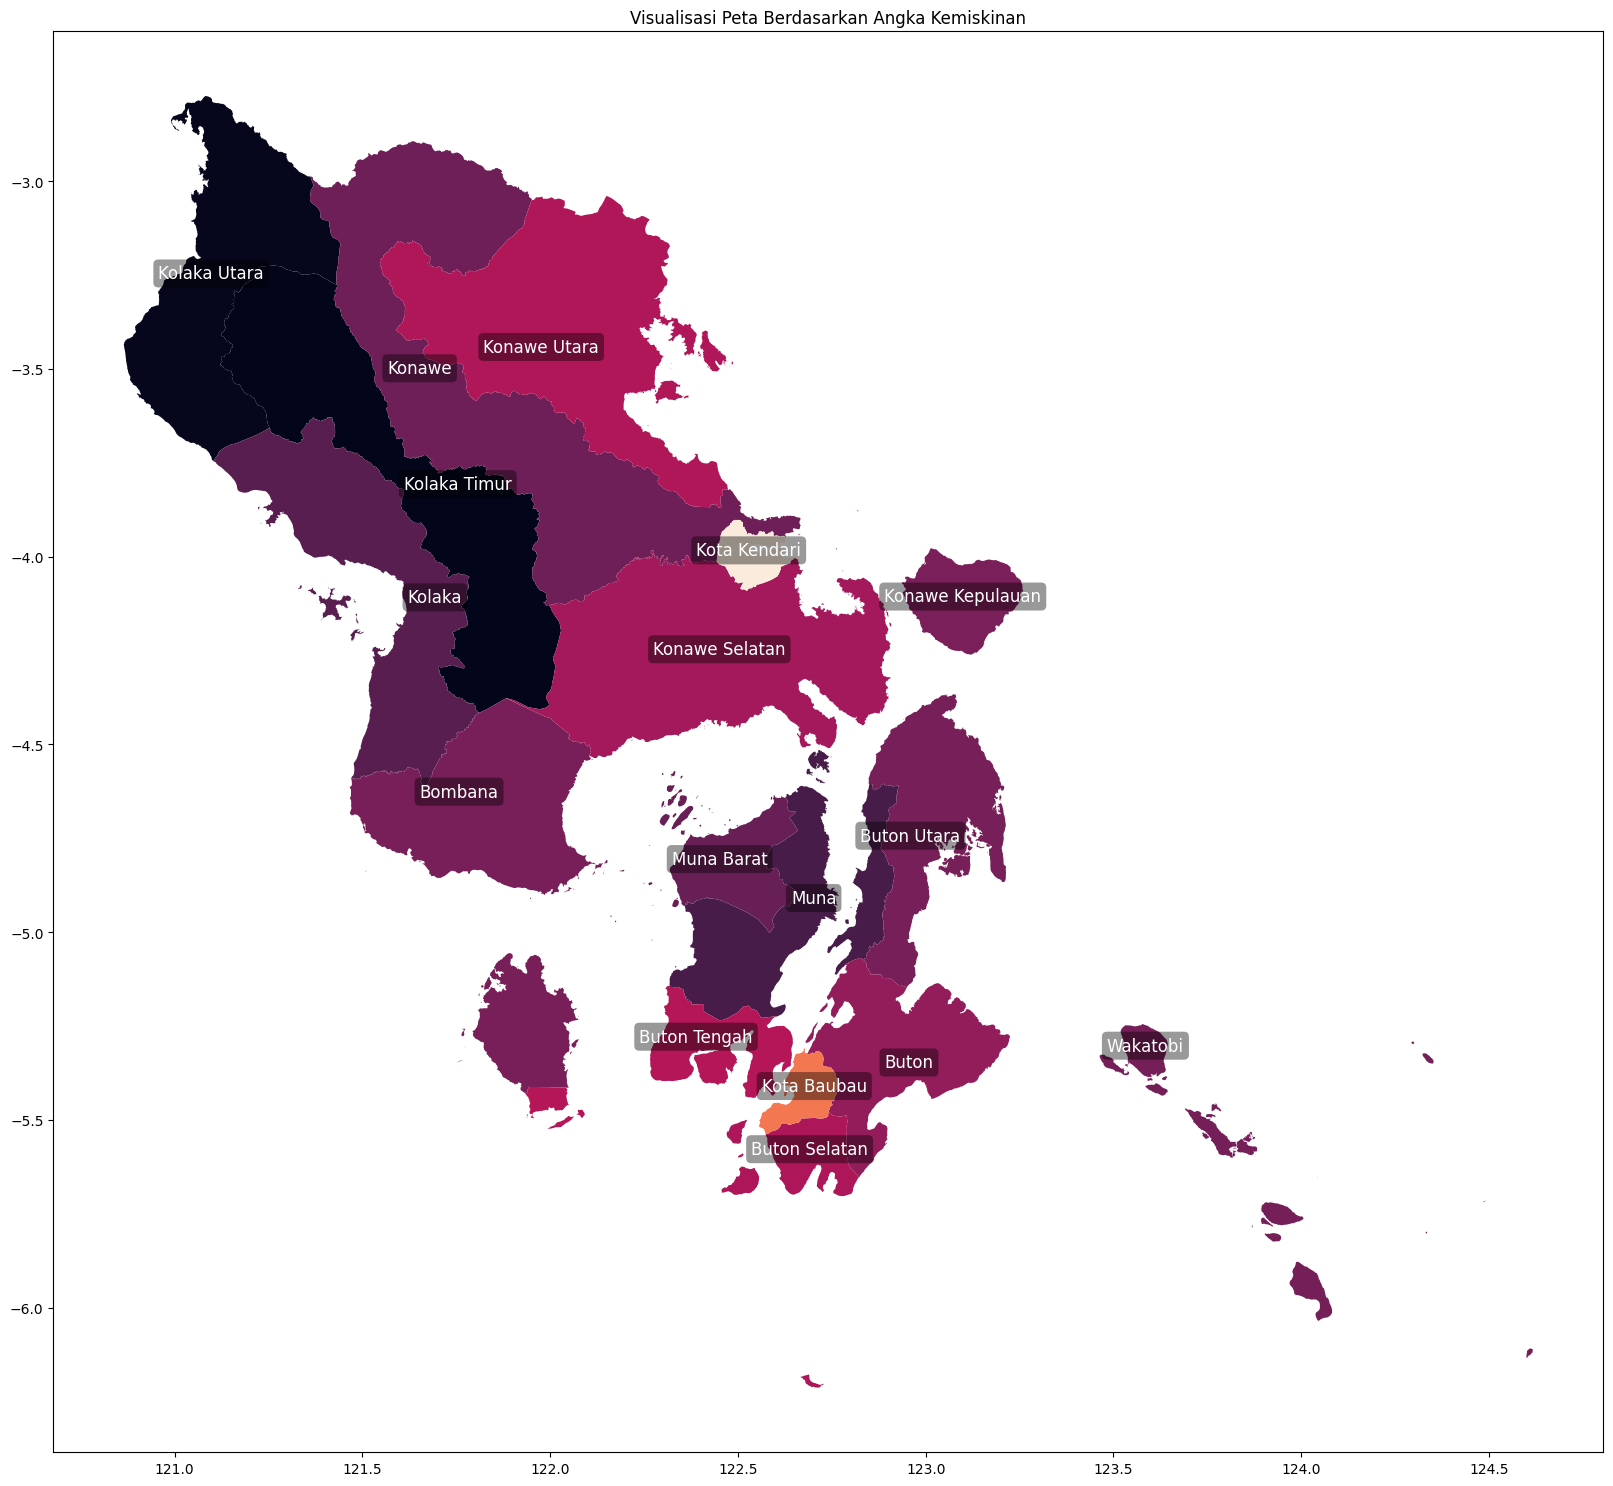

In [36]:
# Membuat plot
fig, ax = plt.subplots(figsize=(20, 20))
data_gdf_ordered.plot(ax=ax, column="Angka Kemiskinan", legend=False, cmap='rocket_r')

# Menambahkan label di dalam area geometrinya menggunakan representative_point()
for x, y, label in zip(data_gdf_ordered.geometry.centroid.x, data_gdf_ordered.geometry.centroid.y, data_gdf_ordered['Nama Kabupaten/Kota']):
    # Menggunakan representative_point untuk memastikan label berada di dalam geometri
    point = data_gdf_ordered.loc[data_gdf_ordered['Nama Kabupaten/Kota'] == label, 'geometry'].values[0].representative_point()

    # Menambahkan label dengan latar belakang dan pengaturan warna kontras
    ax.text(
        point.x, point.y, label,
        fontsize=12, ha='center', color='white',  # Menggunakan teks putih untuk kontras
        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.3')  # Latar belakang hitam transparan
    )

# Menambahkan judul
plt.title('Visualisasi Peta Berdasarkan Angka Kemiskinan')
plt.show()

### Pemetaan Berdasarkan Hasil Klastering

In [37]:
data_gdf_ordered = pd.merge(data, data_gdf, on='Nama Kabupaten/Kota', how='left')
data_gdf_ordered = gpd.GeoDataFrame(data_gdf_ordered, geometry=data_gdf_ordered['geometry'])
data_gdf_ordered

,Nama Kabupaten/Kota,Angka Kemiskinan,Cluster,geometry
0,Kota Kendari,0.000000,0,"MULTIPOLYGON Z (((122.49697 -3.90295 0, 122.49..."
1,Konawe Selatan,0.590030,1,"MULTIPOLYGON Z (((122.21884 -4.48749 0, 122.21..."
2,Konawe,0.717463,1,"MULTIPOLYGON Z (((122.76092 -3.98063 0, 122.76..."
3,Kolaka,0.769774,1,"MULTIPOLYGON Z (((121.44509 -4.17418 0, 121.44..."
4,Muna,0.810144,1,"MULTIPOLYGON Z (((122.33496 -5.08989 0, 122.33..."
5,Bombana,0.692808,1,"MULTIPOLYGON Z (((121.76707 -5.34237 0, 121.76..."
6,Kota Baubau,0.283882,0,"MULTIPOLYGON Z (((122.63056 -5.41998 0, 122.63..."
7,Kolaka Utara,0.985630,2,"MULTIPOLYGON Z (((121.04387 -3.0312 0, 121.043..."
8,Kolaka Timur,1.000000,2,"POLYGON Z ((121.43097 -3.27544 0, 121.43097 -3..."
9,Buton Tengah,0.557695,1,"MULTIPOLYGON Z (((122.05885 -5.49187 0, 122.05..."


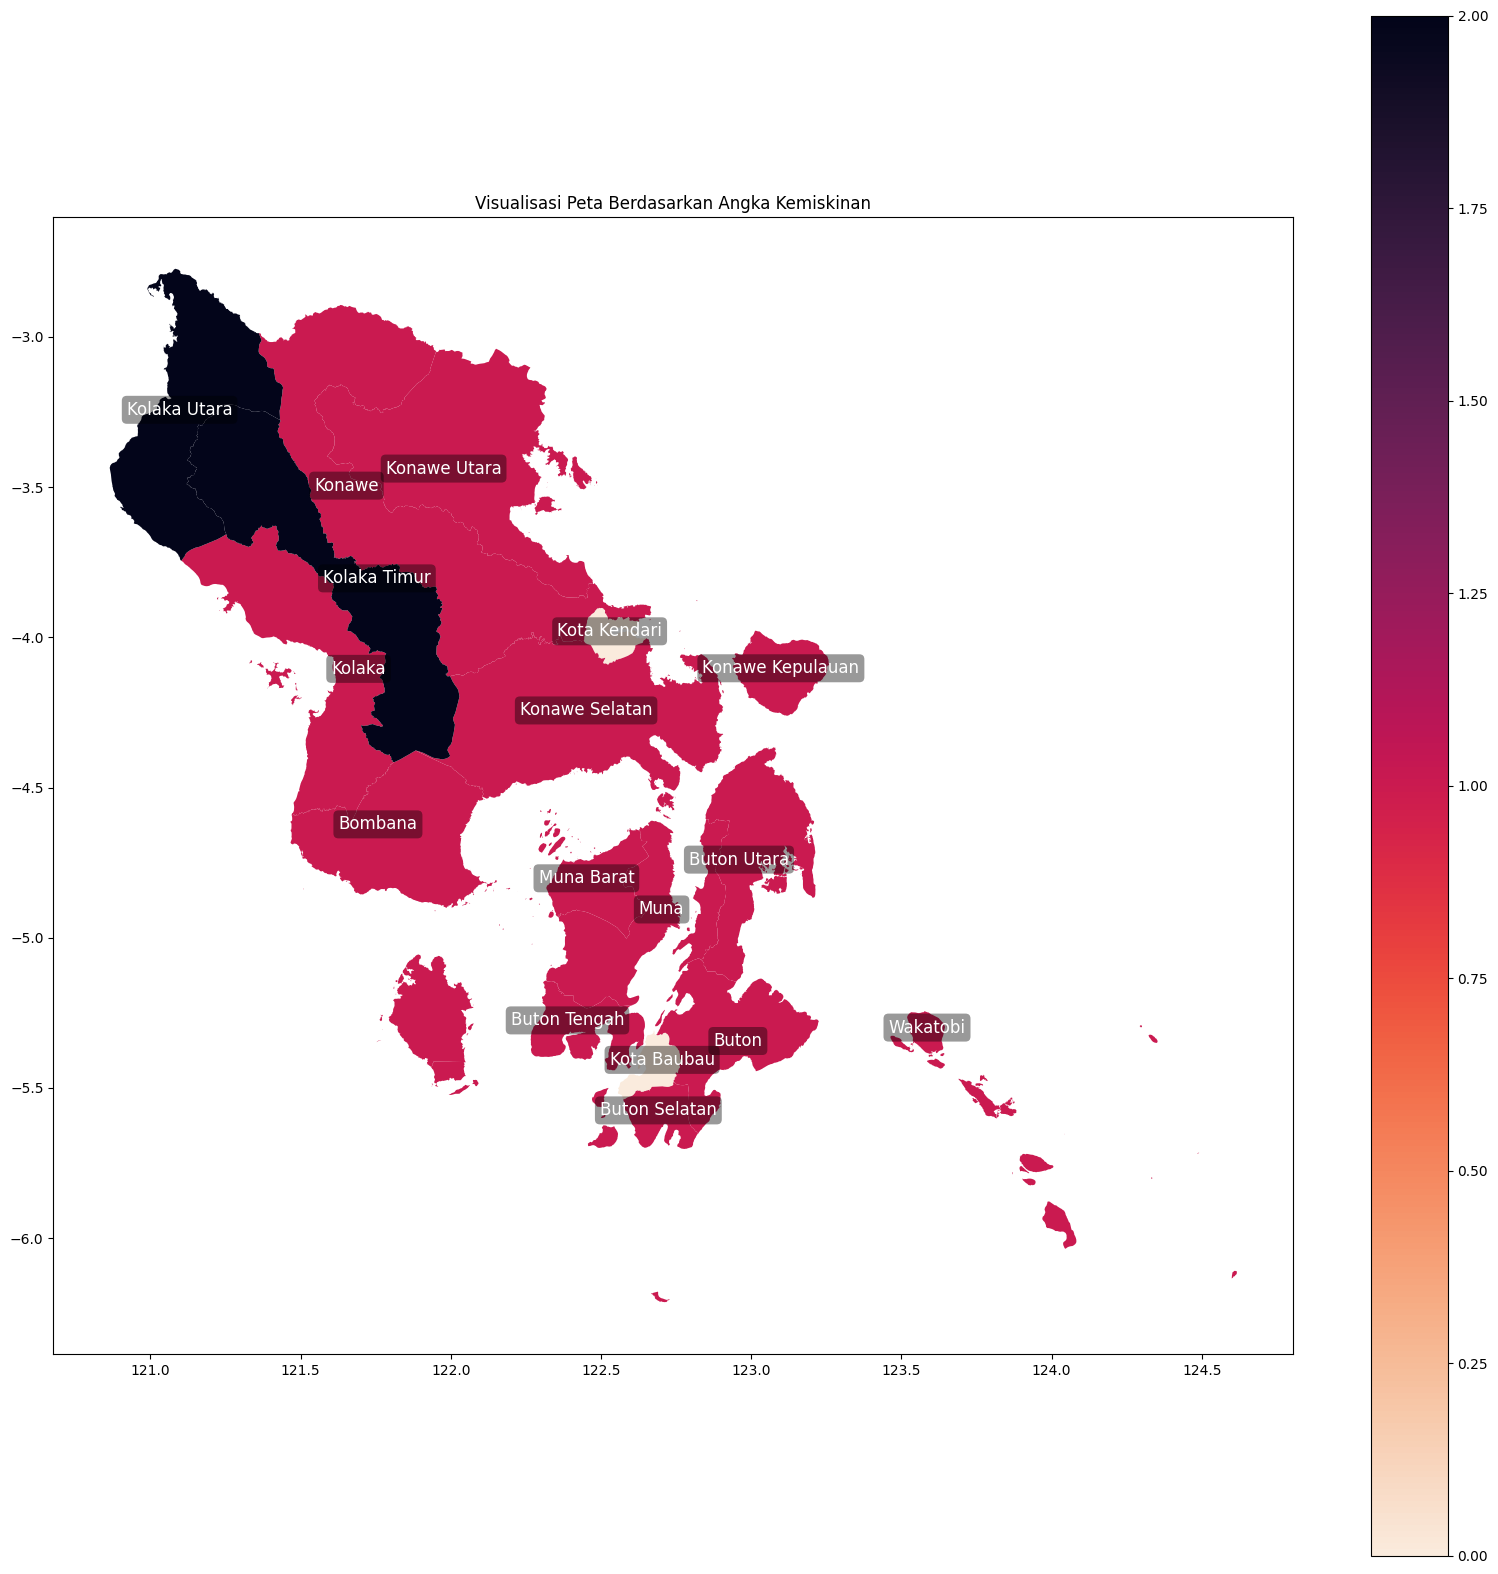

In [38]:
# Membuat plot
fig, ax = plt.subplots(figsize=(20, 20))
data_gdf_ordered.plot(ax=ax, column="Cluster", legend=True, cmap='rocket_r')

# Menambahkan label di dalam area geometrinya menggunakan representative_point()
for x, y, label in zip(data_gdf_ordered.geometry.centroid.x, data_gdf_ordered.geometry.centroid.y, data_gdf_ordered['Nama Kabupaten/Kota']):
    # Menggunakan representative_point untuk memastikan label berada di dalam geometri
    point = data_gdf_ordered.loc[data_gdf_ordered['Nama Kabupaten/Kota'] == label, 'geometry'].values[0].representative_point()

    # Menambahkan label dengan latar belakang dan pengaturan warna kontras
    ax.text(
        point.x, point.y, label,
        fontsize=12, ha='center', color='white',  # Menggunakan teks putih untuk kontras
        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.3')  # Latar belakang hitam transparan
    )

# Menambahkan judul
plt.title('Visualisasi Peta Berdasarkan Angka Kemiskinan')
plt.show()

## Evaluasi

In [39]:
# Evaluasi Fuzzy Partition Coefficient (FPC)
def fuzzy_partition_coefficient(u):
    return np.sum(u ** 2) / u.shape[1]

fpc = fuzzy_partition_coefficient(u)
print(f"Fuzzy Partition Coefficient: {fpc}")

# Evaluasi Sum of Squared Errors (SSE)
def sum_squared_errors(cntr, u, X):
    sse = 0
    for i in range(X.shape[1]):
        for j in range(cntr.shape[0]):
            sse += (u[j, i] ** 2) * np.linalg.norm(X[:, i] - cntr[j]) ** 2
    return sse

sse = sum_squared_errors(cntr, u, X)
print(f"Sum of Squared Errors (SSE): {sse}")

# Evaluasi Silhouette Score (hanya jika data dapat dipetakan ke 2D atau 3D)
# Menghitung silhouette score untuk klastering Fuzzy C-Means
sil_score = silhouette_score(X.T, cluster_labels)
print(f"Silhouette Score: {sil_score}")

Fuzzy Partition Coefficient: 0.8561494097489045
Sum of Squared Errors (SSE): 0.10005484647546306
Silhouette Score: 0.6806537051776875


- FPC itu kalo mendekati satu artinya tiap klaster terpisah dengan jelas
- SSE biasanya lebih kecil semakin baik pemisahan dan kesesuaian data dengan klaster.
- Silhoueter Score:
  
Nilai 1: Titik data sepenuhnya cocok dengan klaster yang diberikan, dan klaster lain jauh.

Nilai 0: Titik data berada di batas antara dua klaster.

Nilai negatif: Titik data dikelompokkan dalam klaster yang salah, yaitu lebih dekat dengan klaster lain daripada klaster yang seharusnya.

## Evaluasi Hasil Klastering Fuzzy C-Means

### 1. **Fuzzy Partition Coefficient (FPC):** `0.8561`
- **FPC** mengukur sejauh mana klaster yang terbentuk memiliki pemisahan yang jelas. Nilai FPC berkisar antara 0 dan 1:
  - **Nilai mendekati 1** menunjukkan pemisahan klaster yang baik, di mana keanggotaan data terhadap lebih dari satu klaster adalah kecil dan jelas.
  - **Nilai mendekati 0** menunjukkan bahwa klaster sangat tumpang tindih.
  
  **Interpretasi:**
  Nilai **0.8561** menunjukkan bahwa klaster yang terbentuk memiliki pemisahan yang cukup baik, dengan sebagian besar data terdistribusi dengan jelas ke dalam klaster yang berbeda. Meskipun ada kemungkinan sedikit tumpang tindih, pemisahan antar klaster sudah cukup jelas.

### 2. **Sum of Squared Errors (SSE):** `0.1001`
- **SSE** mengukur sejauh mana data dalam klaster terpisah dari pusat klaster. Semakin kecil nilai SSE, semakin baik pemisahan data dalam klaster tersebut.
  - **Nilai rendah** menunjukkan data berada dekat dengan pusat klaster.
  - **Nilai tinggi** menunjukkan bahwa data lebih tersebar atau lebih jauh dari pusat klaster.

  **Interpretasi:**
  Nilai **0.1001** menunjukkan bahwa kesalahan (jarak antara data dan pusat klaster) relatif kecil, yang berarti klaster terbentuk dengan baik dan data tidak terlalu tersebar.

### 3. **Silhouette Score:** `0.6807`
- **Silhouette Score** mengukur kualitas klaster berdasarkan dua aspek: kedekatan antar data dalam klaster yang sama dan jarak data terhadap klaster lainnya. Nilai ini berkisar antara **-1 hingga 1**:
  - **Nilai mendekati 1** menunjukkan klaster yang sangat baik.
  - **Nilai mendekati -1** menunjukkan data mungkin dikelompokkan ke dalam klaster yang salah.
  - **Nilai mendekati 0** menunjukkan data berada di perbatasan antara dua klaster.

  **Interpretasi:**
  Nilai **0.6807** menunjukkan bahwa klaster yang terbentuk cukup baik, dengan data dalam klaster cenderung lebih mirip satu sama lain dan terpisah dengan cukup jelas dari klaster lainnya.

---

### Kesimpulan:
- **Fuzzy Partition Coefficient (FPC) = 0.8561**: Klaster cukup terpisah, meskipun mungkin ada sedikit tumpang tindih.
- **Sum of Squared Errors (SSE) = 0.1001**: Klaster cukup homogen, dengan data berada dekat dengan pusat klaster.
- **Silhouette Score = 0.6807**: Klaster terbentuk dengan baik, dengan pemisahan yang jelas antara klaster.

Secara keseluruhan, hasil ini menunjukkan bahwa **klaster yang terbentuk cukup baik** dengan pemisahan yang jelas dan kesalahan yang relatif kecil. Namun, masih ada potensi untuk perbaikan, terutama dalam hal pemisahan klaster yang lebih jelas dan pengurangan tumpang tindih antara klaster.


evaluasi apa yg biasa dipake?